In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Explore The Raw Merged Dataset

## 1. Explore and check the dataset

In [2]:
df = pd.read_csv('data/merged_all_brand.csv')

df

name       price  \
0      Acer Aspire 5 A514-53 i3-1005G1 4GB 512GB FREE...   7.350.000   
1      Acer Aspire 3 A314-22 Athlon Silver A3050 + FH...   5.555.000   
2      ACER ASPIRE 3 SLIM A314 AMD ATHLON 3050/4GB/SS...   6.299.000   
3      Acer Aspire 5 A514-53 - i3-1005G1 8GB 512GB + ...   7.750.000   
4      Acer Aspire 514-53G-52SR with Intel i5 10th Ge...   8.650.000   
...                                                  ...         ...   
21294  MSI PRESTIGE 14 i7 10710 8GB 512ssd GTX1650 4G...  18.699.000   
21295  MSI PRESTIGE 15 A10SC-080ID I7-10710U 16GB 512...  23.499.000   
21296  Laptop MSI Prestige 14 A10RAS - 217 (pink) i7-...  19.999.000   
21297  MSI Prestige 14 A11SCX [9S7-14C412-231] i7-118...  27.999.000   
21298  MSI LAPTOP PRESTIGE 14-A11SCX-231 i7-1185G7 32...  27.999.000   

            location sold                                               link  \
0      Jakarta Utara    8  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
1           Surabaya   11  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
2              Medan    1  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
3             Kediri    3  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
4          Surakarta    4  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
...              ...  ...                                                ...   
21294  Jakarta Utara    1  https://www.tokopedia.com/royalltech/msi-prest...   
21295  Jakarta Pusat    3  https://www.tokopedia.com/zxcomputer/msi-prest...   
21296        Bandung    1  https://www.tokopedia.com/dentshop/laptop-msi-...   
21297  Jakarta Pusat    1  https://www.tokopedia.com/msi-official/msi-pre...   
21298  Jakarta Pusat    1  https://www.tokopedia.com/globalpersadasys/msi...   

             date    series brand  
0      14-01-2021    aspire  Acer  
1      14-01-2021    aspire  Acer  
2      14-01-2021    aspire  Acer  
3      14-01-2021    aspire  Acer  
4      14-01-2021    aspire  Acer  
...           ...       ...   ...  
21294  29-01-2021  prestige   MSI  
21295  29-01-2021  prestige   MSI  
21296  29-01-2021  prestige   MSI  
21297  29-01-2021  prestige   MSI  
21298  29-01-2021  prestige   MSI  

[21299 rows x 8 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21299 entries, 0 to 21298
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      21299 non-null  object
 1   price     21299 non-null  object
 2   location  21299 non-null  object
 3   sold      21299 non-null  object
 4   link      21299 non-null  object
 5   date      21299 non-null  object
 6   series    21299 non-null  object
 7   brand     21299 non-null  object
dtypes: object(8)
memory usage: 1.3+ MB


In [4]:
df.isna().sum()

name        0
price       0
location    0
sold        0
link        0
date        0
series      0
brand       0
dtype: int64

The obtained information from the dataset:
1. There is no missing value
2. The feature variable `name` shows that the product name includes the specification of the laptop. It is apparently common as a product's name in e-commerce to help buyer found the specification in the search bar.
3. There are different shops that sell the same product. For example, take the data [0] and [4] which both sell the same product 'Acer Aspire 5 A514-53'.
4. With the consideration that the same product also sold in the different date, product ID needs to be added.
5. The data type of feature variable `price` is in object. Thus, it needs to be changed into float (even in Indonesian Rupiah, the good practice of price's data type is supposed in float).
6. The data type of feature variable `sold` is in object. Thus, it needs to be changed into integer as it represents the number of the product sold in the specific date.
7. Most of the feature variable `link` which the value starts with "https://ta.tokopedia.com/promo/" cannot be accessed. But it still contains the original link of the product nears the end of the link.
8. The value of feature variable `link` consists of the product link where it includes the shop's Tokopedia ID and the product's name.
9. The data type of feature variable `date` is in object. Thus, it needs to be changed into date time.

# Data Manipulation & Data Cleaning

## 1. Change the data type of feature variable `price`

In [5]:
try:
    # remove the character '.' from the price's value
    df['price'] = pd.to_numeric(df['price'].str.replace('.', ''))
    df['price'] = df['price'].astype(float)
except ValueError:
    print(f"There is at least one string that cannot be converted. Presumably the character is not numeric")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21299 entries, 0 to 21298
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      21299 non-null  object 
 1   price     21299 non-null  float64
 2   location  21299 non-null  object 
 3   sold      21299 non-null  object 
 4   link      21299 non-null  object 
 5   date      21299 non-null  object 
 6   series    21299 non-null  object 
 7   brand     21299 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.3+ MB


The data type of feature variable `price` has been changed into float

## 2. Change the data type of feature variable `sold`

In [7]:
try:
    df['sold'] = pd.to_numeric(df['sold'])
except ValueError:
    print(f"There is at least one string that cannot be converted. Presumably the character is not numeric")

There is at least one string that cannot be converted. Presumably the character is not numeric


Apparently there is at least one value that cannot be converted into numeric type. Thus, all the value of feature variable `price` need to be checked if it is in numeric or not.

In [8]:
# make new column `sold_isnumeric` to determine whether the value is in numeric (represented as 1) or not (represented as 0)
df['sold_isnumeric'] = np.where(df['sold'].str.isnumeric(), 1, 0)

df

name       price  \
0      Acer Aspire 5 A514-53 i3-1005G1 4GB 512GB FREE...   7350000.0   
1      Acer Aspire 3 A314-22 Athlon Silver A3050 + FH...   5555000.0   
2      ACER ASPIRE 3 SLIM A314 AMD ATHLON 3050/4GB/SS...   6299000.0   
3      Acer Aspire 5 A514-53 - i3-1005G1 8GB 512GB + ...   7750000.0   
4      Acer Aspire 514-53G-52SR with Intel i5 10th Ge...   8650000.0   
...                                                  ...         ...   
21294  MSI PRESTIGE 14 i7 10710 8GB 512ssd GTX1650 4G...  18699000.0   
21295  MSI PRESTIGE 15 A10SC-080ID I7-10710U 16GB 512...  23499000.0   
21296  Laptop MSI Prestige 14 A10RAS - 217 (pink) i7-...  19999000.0   
21297  MSI Prestige 14 A11SCX [9S7-14C412-231] i7-118...  27999000.0   
21298  MSI LAPTOP PRESTIGE 14-A11SCX-231 i7-1185G7 32...  27999000.0   

            location sold                                               link  \
0      Jakarta Utara    8  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
1           Surabaya   11  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
2              Medan    1  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
3             Kediri    3  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
4          Surakarta    4  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
...              ...  ...                                                ...   
21294  Jakarta Utara    1  https://www.tokopedia.com/royalltech/msi-prest...   
21295  Jakarta Pusat    3  https://www.tokopedia.com/zxcomputer/msi-prest...   
21296        Bandung    1  https://www.tokopedia.com/dentshop/laptop-msi-...   
21297  Jakarta Pusat    1  https://www.tokopedia.com/msi-official/msi-pre...   
21298  Jakarta Pusat    1  https://www.tokopedia.com/globalpersadasys/msi...   

             date    series brand  sold_isnumeric  
0      14-01-2021    aspire  Acer               1  
1      14-01-2021    aspire  Acer               1  
2      14-01-2021    aspire  Acer               1  
3      14-01-2021    aspire  Acer               1  
4      14-01-2021    aspire  Acer               1  
...           ...       ...   ...             ...  
21294  29-01-2021  prestige   MSI               1  
21295  29-01-2021  prestige   MSI               1  
21296  29-01-2021  prestige   MSI               1  
21297  29-01-2021  prestige   MSI               1  
21298  29-01-2021  prestige   MSI               1  

[21299 rows x 9 columns]

In [9]:
# count the number of value which is numeric and non-numeric
print(df['sold_isnumeric'].value_counts())

# show the non-numeric value in feature variable `sold`
print(df.loc[df['sold_isnumeric'] == 0, ['sold']])

sold_isnumeric
1    21292
0        7
Name: count, dtype: int64
         sold
11132  1,1 rb
14337  1,0 rb
15603  1,0 rb
15812  1,0 rb
16020  1,0 rb
16440  1,0 rb
16652  1,0 rb


Apparently there are 7 non-numeric values. The pattern is the same as it happens to the value that reachs 1000 or more. The thousand is represented with 'rb'. Another factor that makes those values as non-numeric value is the character ','. The float supposes to be represented in character '.'. As the replacement of the value to become the numeric value, the 'rb' needs to be removed and the character ',' needs to be changed into '.'. After that, the value will be multiplied by 1000.

In [10]:
# remove 'rb'
df['sold'] = df.apply(lambda r: r['sold'].replace(' rb', '') if r['sold_isnumeric'] == 0 else r['sold'], axis=1)

# change ',' into '.'
df['sold'] = df.apply(lambda r: r['sold'].replace(',', '.') if r['sold_isnumeric'] == 0 else r['sold'], axis=1)

In [11]:
try:
    # change the value into numeric and multiplies it with 1000
    df['sold'] = pd.to_numeric(df['sold'])
    df['sold'] = df.apply(lambda r: r['sold'] * 1000 if r['sold_isnumeric'] == 0 else r['sold'], axis=1)
    df['sold'] = df['sold'].astype(int)

    print(df.loc[df['sold_isnumeric'] == 0, ['sold']])
except ValueError:
    print(f"There is at least one string that cannot be converted. Presumably the character is not numeric")

       sold
11132  1100
14337  1000
15603  1000
15812  1000
16020  1000
16440  1000
16652  1000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21299 entries, 0 to 21298
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            21299 non-null  object 
 1   price           21299 non-null  float64
 2   location        21299 non-null  object 
 3   sold            21299 non-null  int32  
 4   link            21299 non-null  object 
 5   date            21299 non-null  object 
 6   series          21299 non-null  object 
 7   brand           21299 non-null  object 
 8   sold_isnumeric  21299 non-null  int32  
dtypes: float64(1), int32(2), object(6)
memory usage: 1.3+ MB


The data type of feature variable `sold` has been changed into integer

In [13]:
# drop the column `sold_isnumeric`
df.drop(columns=['sold_isnumeric'], inplace=True)

df

name       price  \
0      Acer Aspire 5 A514-53 i3-1005G1 4GB 512GB FREE...   7350000.0   
1      Acer Aspire 3 A314-22 Athlon Silver A3050 + FH...   5555000.0   
2      ACER ASPIRE 3 SLIM A314 AMD ATHLON 3050/4GB/SS...   6299000.0   
3      Acer Aspire 5 A514-53 - i3-1005G1 8GB 512GB + ...   7750000.0   
4      Acer Aspire 514-53G-52SR with Intel i5 10th Ge...   8650000.0   
...                                                  ...         ...   
21294  MSI PRESTIGE 14 i7 10710 8GB 512ssd GTX1650 4G...  18699000.0   
21295  MSI PRESTIGE 15 A10SC-080ID I7-10710U 16GB 512...  23499000.0   
21296  Laptop MSI Prestige 14 A10RAS - 217 (pink) i7-...  19999000.0   
21297  MSI Prestige 14 A11SCX [9S7-14C412-231] i7-118...  27999000.0   
21298  MSI LAPTOP PRESTIGE 14-A11SCX-231 i7-1185G7 32...  27999000.0   

            location  sold                                               link  \
0      Jakarta Utara     8  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
1           Surabaya    11  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
2              Medan     1  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
3             Kediri     3  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
4          Surakarta     4  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
...              ...   ...                                                ...   
21294  Jakarta Utara     1  https://www.tokopedia.com/royalltech/msi-prest...   
21295  Jakarta Pusat     3  https://www.tokopedia.com/zxcomputer/msi-prest...   
21296        Bandung     1  https://www.tokopedia.com/dentshop/laptop-msi-...   
21297  Jakarta Pusat     1  https://www.tokopedia.com/msi-official/msi-pre...   
21298  Jakarta Pusat     1  https://www.tokopedia.com/globalpersadasys/msi...   

             date    series brand  
0      14-01-2021    aspire  Acer  
1      14-01-2021    aspire  Acer  
2      14-01-2021    aspire  Acer  
3      14-01-2021    aspire  Acer  
4      14-01-2021    aspire  Acer  
...           ...       ...   ...  
21294  29-01-2021  prestige   MSI  
21295  29-01-2021  prestige   MSI  
21296  29-01-2021  prestige   MSI  
21297  29-01-2021  prestige   MSI  
21298  29-01-2021  prestige   MSI  

[21299 rows x 8 columns]

## 3. Change the data type of feature variable `date`

In [14]:
try:
    df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
except ValueError:
    print(f"There is at least one string that cannot be converted.")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21299 entries, 0 to 21298
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   name      21299 non-null  object        
 1   price     21299 non-null  float64       
 2   location  21299 non-null  object        
 3   sold      21299 non-null  int32         
 4   link      21299 non-null  object        
 5   date      21299 non-null  datetime64[ns]
 6   series    21299 non-null  object        
 7   brand     21299 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(5)
memory usage: 1.2+ MB


The data type of feature variable `date` has been changed into integer

## 4. Take the shop ID from the link as `id_shop`

* __Version 1__:
    https://www.tokopedia.com/ __id_shop__ /...

_Example_:
https://www.tokopedia.com/ __protechcom__ /laptop-acer-aspire-3-a314-22-amd-athlon-3050u-4gb-256gb-14-fhd-w10?whid=0

***

* __Version 2__:
https://ta.tokopedia.com/promo/v1/...&r=https%3A%2F%2Fwww.tokopedia.com%2F __id_shop__ %2F...

_Example_:
https://ta.tokopedia.com/promo/v1/...r=https%3A%2F%2Fwww.tokopedia.com%2F __tokolaptopid__ %2Facer-aspire-5-a514-53-i3-1005g1-4gb-512gb-free-office-garansi-resmi%3Fsrc%3Dtopads&src=search

In [16]:
df['id_shop'] = np.nan

In [17]:
cond = df['link'].str.startswith('https://www.tokopedia.com')

# regex of link version 1
patt_1 = r'https://www.tokopedia.com/([^/]+)/'

# regex of link version 2
patt_2 = r'www.tokopedia.com%2F(.*?)%2F'

# search and take the shop's Tokopedia ID as `id_shop` based on the pattern of link
df['id_shop'] = df.apply(lambda row: re.search(patt_1, row['link']).group(1) if cond[row.name] else re.search(patt_2, row['link']).group(1), axis=1)

In [18]:
df

name       price  \
0      Acer Aspire 5 A514-53 i3-1005G1 4GB 512GB FREE...   7350000.0   
1      Acer Aspire 3 A314-22 Athlon Silver A3050 + FH...   5555000.0   
2      ACER ASPIRE 3 SLIM A314 AMD ATHLON 3050/4GB/SS...   6299000.0   
3      Acer Aspire 5 A514-53 - i3-1005G1 8GB 512GB + ...   7750000.0   
4      Acer Aspire 514-53G-52SR with Intel i5 10th Ge...   8650000.0   
...                                                  ...         ...   
21294  MSI PRESTIGE 14 i7 10710 8GB 512ssd GTX1650 4G...  18699000.0   
21295  MSI PRESTIGE 15 A10SC-080ID I7-10710U 16GB 512...  23499000.0   
21296  Laptop MSI Prestige 14 A10RAS - 217 (pink) i7-...  19999000.0   
21297  MSI Prestige 14 A11SCX [9S7-14C412-231] i7-118...  27999000.0   
21298  MSI LAPTOP PRESTIGE 14-A11SCX-231 i7-1185G7 32...  27999000.0   

            location  sold                                               link  \
0      Jakarta Utara     8  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
1           Surabaya    11  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
2              Medan     1  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
3             Kediri     3  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
4          Surakarta     4  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
...              ...   ...                                                ...   
21294  Jakarta Utara     1  https://www.tokopedia.com/royalltech/msi-prest...   
21295  Jakarta Pusat     3  https://www.tokopedia.com/zxcomputer/msi-prest...   
21296        Bandung     1  https://www.tokopedia.com/dentshop/laptop-msi-...   
21297  Jakarta Pusat     1  https://www.tokopedia.com/msi-official/msi-pre...   
21298  Jakarta Pusat     1  https://www.tokopedia.com/globalpersadasys/msi...   

            date    series brand           id_shop  
0     2021-01-14    aspire  Acer      tokolaptopid  
1     2021-01-14    aspire  Acer     trinityitzone  
2     2021-01-14    aspire  Acer  majumandiricom-1  
3     2021-01-14    aspire  Acer        rajacomkdr  
4     2021-01-14    aspire  Acer  ariekakakoesnadi  
...          ...       ...   ...               ...  
21294 2021-01-29  prestige   MSI        royalltech  
21295 2021-01-29  prestige   MSI        zxcomputer  
21296 2021-01-29  prestige   MSI          dentshop  
21297 2021-01-29  prestige   MSI      msi-official  
21298 2021-01-29  prestige   MSI  globalpersadasys  

[21299 rows x 9 columns]

In [19]:
df['id_shop'].isna().sum()

0

Sucessfully obtain all the `id_shop` as there is no NaN value in the feature variable `id_shop`

## 5. Get information based on the feature variable `name`

### a. Text normalization

In [20]:
# Transforming all character into lowercase in order to reduce the variations and set the standard of some words
df['name_lower'] = df['name'].str.lower()

df

name       price  \
0      Acer Aspire 5 A514-53 i3-1005G1 4GB 512GB FREE...   7350000.0   
1      Acer Aspire 3 A314-22 Athlon Silver A3050 + FH...   5555000.0   
2      ACER ASPIRE 3 SLIM A314 AMD ATHLON 3050/4GB/SS...   6299000.0   
3      Acer Aspire 5 A514-53 - i3-1005G1 8GB 512GB + ...   7750000.0   
4      Acer Aspire 514-53G-52SR with Intel i5 10th Ge...   8650000.0   
...                                                  ...         ...   
21294  MSI PRESTIGE 14 i7 10710 8GB 512ssd GTX1650 4G...  18699000.0   
21295  MSI PRESTIGE 15 A10SC-080ID I7-10710U 16GB 512...  23499000.0   
21296  Laptop MSI Prestige 14 A10RAS - 217 (pink) i7-...  19999000.0   
21297  MSI Prestige 14 A11SCX [9S7-14C412-231] i7-118...  27999000.0   
21298  MSI LAPTOP PRESTIGE 14-A11SCX-231 i7-1185G7 32...  27999000.0   

            location  sold                                               link  \
0      Jakarta Utara     8  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
1           Surabaya    11  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
2              Medan     1  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
3             Kediri     3  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
4          Surakarta     4  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
...              ...   ...                                                ...   
21294  Jakarta Utara     1  https://www.tokopedia.com/royalltech/msi-prest...   
21295  Jakarta Pusat     3  https://www.tokopedia.com/zxcomputer/msi-prest...   
21296        Bandung     1  https://www.tokopedia.com/dentshop/laptop-msi-...   
21297  Jakarta Pusat     1  https://www.tokopedia.com/msi-official/msi-pre...   
21298  Jakarta Pusat     1  https://www.tokopedia.com/globalpersadasys/msi...   

            date    series brand           id_shop  \
0     2021-01-14    aspire  Acer      tokolaptopid   
1     2021-01-14    aspire  Acer     trinityitzone   
2     2021-01-14    aspire  Acer  majumandiricom-1   
3     2021-01-14    aspire  Acer        rajacomkdr   
4     2021-01-14    aspire  Acer  ariekakakoesnadi   
...          ...       ...   ...               ...   
21294 2021-01-29  prestige   MSI        royalltech   
21295 2021-01-29  prestige   MSI        zxcomputer   
21296 2021-01-29  prestige   MSI          dentshop   
21297 2021-01-29  prestige   MSI      msi-official   
21298 2021-01-29  prestige   MSI  globalpersadasys   

                                              name_lower  
0      acer aspire 5 a514-53 i3-1005g1 4gb 512gb free...  
1      acer aspire 3 a314-22 athlon silver a3050 + fh...  
2      acer aspire 3 slim a314 amd athlon 3050/4gb/ss...  
3      acer aspire 5 a514-53 - i3-1005g1 8gb 512gb + ...  
4      acer aspire 514-53g-52sr with intel i5 10th ge...  
...                                                  ...  
21294  msi prestige 14 i7 10710 8gb 512ssd gtx1650 4g...  
21295  msi prestige 15 a10sc-080id i7-10710u 16gb 512...  
21296  laptop msi prestige 14 a10ras - 217 (pink) i7-...  
21297  msi prestige 14 a11scx [9s7-14c412-231] i7-118...  
21298  msi laptop prestige 14-a11scx-231 i7-1185g7 32...  

[21299 rows x 10 columns]

### b. Get product ID

In consideration as there are the same product that sold in different dates and the fact that the products might also be sold by different shop, the product ID is necessary. To make sure that all the products get their IDs, the checking is done based on column `name_lower` and `id_shop`. The feature variable `link` is considered unreliable as the link might generate differently, especially in the link which has the version https://ta.tokopedia.com/promo/v1...

In [21]:
# Get all the unique product based on the product's name (`name_lower`) and the shop where it was sold (`id_shop`)
unique_products = df.drop_duplicates(subset=['name_lower', 'id_shop']).copy()
unique_products['id_product'] = range(1, len(unique_products) + 1)

df = df.merge(unique_products[['name_lower', 'id_shop', 'id_product']], on=['name_lower', 'id_shop'], how='left')

In [22]:
df

name       price  \
0      Acer Aspire 5 A514-53 i3-1005G1 4GB 512GB FREE...   7350000.0   
1      Acer Aspire 3 A314-22 Athlon Silver A3050 + FH...   5555000.0   
2      ACER ASPIRE 3 SLIM A314 AMD ATHLON 3050/4GB/SS...   6299000.0   
3      Acer Aspire 5 A514-53 - i3-1005G1 8GB 512GB + ...   7750000.0   
4      Acer Aspire 514-53G-52SR with Intel i5 10th Ge...   8650000.0   
...                                                  ...         ...   
21294  MSI PRESTIGE 14 i7 10710 8GB 512ssd GTX1650 4G...  18699000.0   
21295  MSI PRESTIGE 15 A10SC-080ID I7-10710U 16GB 512...  23499000.0   
21296  Laptop MSI Prestige 14 A10RAS - 217 (pink) i7-...  19999000.0   
21297  MSI Prestige 14 A11SCX [9S7-14C412-231] i7-118...  27999000.0   
21298  MSI LAPTOP PRESTIGE 14-A11SCX-231 i7-1185G7 32...  27999000.0   

            location  sold                                               link  \
0      Jakarta Utara     8  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
1           Surabaya    11  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
2              Medan     1  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
3             Kediri     3  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
4          Surakarta     4  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
...              ...   ...                                                ...   
21294  Jakarta Utara     1  https://www.tokopedia.com/royalltech/msi-prest...   
21295  Jakarta Pusat     3  https://www.tokopedia.com/zxcomputer/msi-prest...   
21296        Bandung     1  https://www.tokopedia.com/dentshop/laptop-msi-...   
21297  Jakarta Pusat     1  https://www.tokopedia.com/msi-official/msi-pre...   
21298  Jakarta Pusat     1  https://www.tokopedia.com/globalpersadasys/msi...   

            date    series brand           id_shop  \
0     2021-01-14    aspire  Acer      tokolaptopid   
1     2021-01-14    aspire  Acer     trinityitzone   
2     2021-01-14    aspire  Acer  majumandiricom-1   
3     2021-01-14    aspire  Acer        rajacomkdr   
4     2021-01-14    aspire  Acer  ariekakakoesnadi   
...          ...       ...   ...               ...   
21294 2021-01-29  prestige   MSI        royalltech   
21295 2021-01-29  prestige   MSI        zxcomputer   
21296 2021-01-29  prestige   MSI          dentshop   
21297 2021-01-29  prestige   MSI      msi-official   
21298 2021-01-29  prestige   MSI  globalpersadasys   

                                              name_lower  id_product  
0      acer aspire 5 a514-53 i3-1005g1 4gb 512gb free...           1  
1      acer aspire 3 a314-22 athlon silver a3050 + fh...           2  
2      acer aspire 3 slim a314 amd athlon 3050/4gb/ss...           3  
3      acer aspire 5 a514-53 - i3-1005g1 8gb 512gb + ...           4  
4      acer aspire 514-53g-52sr with intel i5 10th ge...           5  
...                                                  ...         ...  
21294  msi prestige 14 i7 10710 8gb 512ssd gtx1650 4g...        5118  
21295  msi prestige 15 a10sc-080id i7-10710u 16gb 512...        5120  
21296  laptop msi prestige 14 a10ras - 217 (pink) i7-...        5116  
21297  msi prestige 14 a11scx [9s7-14c412-231] i7-118...        5119  
21298  msi laptop prestige 14-a11scx-231 i7-1185g7 32...        5113  

[21299 rows x 11 columns]

In [23]:
df['id_product'].max()

5120

Apparently there are 5120 different products from different shops in the dataset

### c. Analyse the Word Cloud

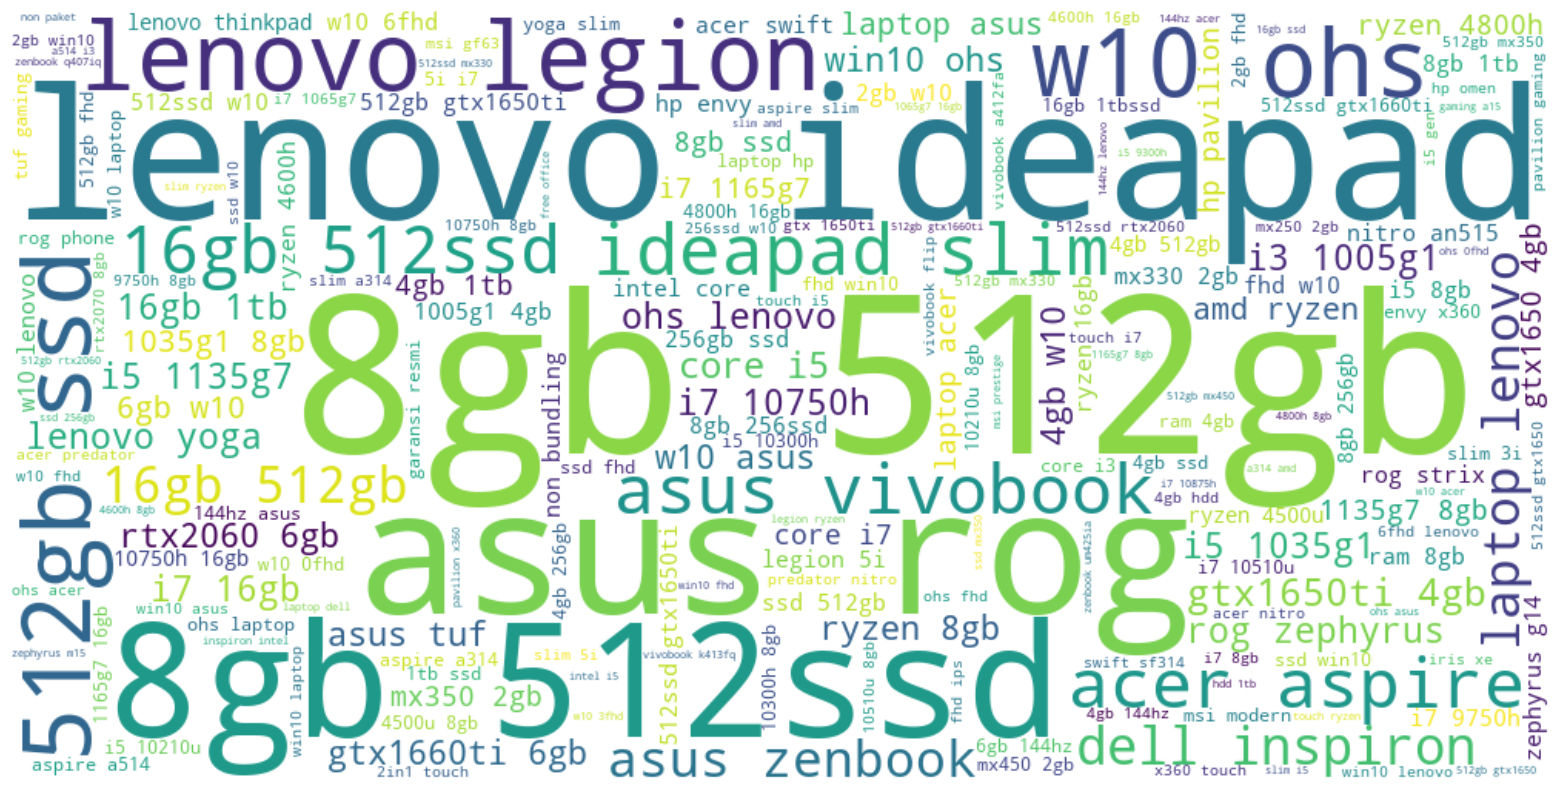

In [24]:
text = ' '.join(df['name_lower'])
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Except the brand and series's of the laptop in the dataset, there are several insights that can be acquired from the column `name`
1. '8gb' and '512gb' specification are mention in the most product name. Talking about the laptop specification in general, '8gb' often regarded as RAM and '512gb' often regarded as laptop's storage.
2. Other than '8gb' RAM specification, there are some variations of storage, such as '16gb' and '4gb'
3. Other than '512gb' storage specification, there are some variations of storage, such as '256gb', '1tb' and '2tb'
4. There are a lot of products which mention 'ryzen'. That is one of processor/CPU model from brand AMD. Due to the various version of AMD CPU, the only information can be taken is whether the laptop uses the AMD CPU or not. Additional information, other version of AMD CPU which also uses widely in the market is 'althon'.
5. There are a lot of products which mention 'i3', 'i5', 'i7', 'core', or 'intel'. Those are informations related to processor/CPU from brand Intel. Due to the various version of Intel CPU, the only information can be taken is whether the laptop uses the AMD CPU or not. Additional information, other version of AMD CPU which also uses widely in the market are 'celeron' and 'pentium'.
6. There are a lot of products which mention 'gtx' or 'rtx'. Those are GPU from brand NVIDIA. Nevertheless, due to the various type of GPU version while also lacking the information of overall GPU version, this information will be ignored for now.
7. Some product mention 'w10' or 'win10' in the product's name to state that the laptop's OS is Windows 10. Apparently there is no other OS appears in the word cloud. As it lacks variation, this specification is considered less significant.
8. Several products mention 'laptop' in their product's name. This can be considered to be removed as the products in the dataset are certainly consist of laptops.
9. Found non-laptop product 'rog phone' and 'pc'. This can be considered to be removed as the dataset is about laptop.

### d. Delete the word 'laptop' from the product's name

In [25]:
df['name_lower'] = df['name_lower'].str.replace('laptop', '')

### e. Delete phone products

In [26]:
df = df[~df['name_lower'].str.contains('phone', case=False, na=False)]
df = df[~df['name_lower'].str.contains('pc', case=False, na=False)]
df = df.reset_index(drop=True)

df

name       price  \
0      Acer Aspire 5 A514-53 i3-1005G1 4GB 512GB FREE...   7350000.0   
1      Acer Aspire 3 A314-22 Athlon Silver A3050 + FH...   5555000.0   
2      ACER ASPIRE 3 SLIM A314 AMD ATHLON 3050/4GB/SS...   6299000.0   
3      Acer Aspire 5 A514-53 - i3-1005G1 8GB 512GB + ...   7750000.0   
4      Acer Aspire 514-53G-52SR with Intel i5 10th Ge...   8650000.0   
...                                                  ...         ...   
20430  MSI PRESTIGE 14 i7 10710 8GB 512ssd GTX1650 4G...  18699000.0   
20431  MSI PRESTIGE 15 A10SC-080ID I7-10710U 16GB 512...  23499000.0   
20432  Laptop MSI Prestige 14 A10RAS - 217 (pink) i7-...  19999000.0   
20433  MSI Prestige 14 A11SCX [9S7-14C412-231] i7-118...  27999000.0   
20434  MSI LAPTOP PRESTIGE 14-A11SCX-231 i7-1185G7 32...  27999000.0   

            location  sold                                               link  \
0      Jakarta Utara     8  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
1           Surabaya    11  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
2              Medan     1  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
3             Kediri     3  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
4          Surakarta     4  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
...              ...   ...                                                ...   
20430  Jakarta Utara     1  https://www.tokopedia.com/royalltech/msi-prest...   
20431  Jakarta Pusat     3  https://www.tokopedia.com/zxcomputer/msi-prest...   
20432        Bandung     1  https://www.tokopedia.com/dentshop/laptop-msi-...   
20433  Jakarta Pusat     1  https://www.tokopedia.com/msi-official/msi-pre...   
20434  Jakarta Pusat     1  https://www.tokopedia.com/globalpersadasys/msi...   

            date    series brand           id_shop  \
0     2021-01-14    aspire  Acer      tokolaptopid   
1     2021-01-14    aspire  Acer     trinityitzone   
2     2021-01-14    aspire  Acer  majumandiricom-1   
3     2021-01-14    aspire  Acer        rajacomkdr   
4     2021-01-14    aspire  Acer  ariekakakoesnadi   
...          ...       ...   ...               ...   
20430 2021-01-29  prestige   MSI        royalltech   
20431 2021-01-29  prestige   MSI        zxcomputer   
20432 2021-01-29  prestige   MSI          dentshop   
20433 2021-01-29  prestige   MSI      msi-official   
20434 2021-01-29  prestige   MSI  globalpersadasys   

                                              name_lower  id_product  
0      acer aspire 5 a514-53 i3-1005g1 4gb 512gb free...           1  
1      acer aspire 3 a314-22 athlon silver a3050 + fh...           2  
2      acer aspire 3 slim a314 amd athlon 3050/4gb/ss...           3  
3      acer aspire 5 a514-53 - i3-1005g1 8gb 512gb + ...           4  
4      acer aspire 514-53g-52sr with intel i5 10th ge...           5  
...                                                  ...         ...  
20430  msi prestige 14 i7 10710 8gb 512ssd gtx1650 4g...        5118  
20431  msi prestige 15 a10sc-080id i7-10710u 16gb 512...        5120  
20432   msi prestige 14 a10ras - 217 (pink) i7-10510u...        5116  
20433  msi prestige 14 a11scx [9s7-14c412-231] i7-118...        5119  
20434  msi  prestige 14-a11scx-231 i7-1185g7 32gb 1tb...        5113  

[20435 rows x 11 columns]

### f. Add the specification information about the laptop's storage

In [27]:
df['storage'] = np.nan

# List of various storage which is popular in laptop market
storage_list = ['256', '512', '1tb', '1 tb', '2tb', '2 tb']

# Add the information about the laptop's storage in the feature variable `storage`
for word in storage_list:
    df.loc[df['name_lower'].str.contains(word), 'storage'] = word

In [28]:
# Standarize the value of laptop's storage

df.loc[df['storage'] == '256', 'storage'] = '256 GB'
df.loc[df['storage'] == '512', 'storage'] = '512 GB'
df.loc[df['storage'] == '1tb', 'storage'] = '1 TB'
df.loc[df['storage'] == '1 tb', 'storage'] = '1 TB'
df.loc[df['storage'] == '2tb', 'storage'] = '2 TB'
df.loc[df['storage'] == '2tb', 'storage'] = '2 TB'

### g. Add the specification information about the laptop's CPU

In [29]:
df['cpu'] = np.nan

# List of various AMD CPU which is popular in laptop market
# AMD CPU executed first in order not confuse the AMD GPU that might be used in laptop alongside Intel CPU  as the brand AMD also produces GPU
cpu_list_amd = ['amd', 'athlon', 'ryzen']
# Add the information about the laptop's CPU in the feature variable `cpu`
for word in cpu_list_amd:
    df.loc[df['name_lower'].str.contains(word), 'cpu'] = 'AMD'

# List of various Intel CPU which is popular in laptop market
cpu_list_intel = ['intel', 'celeron', 'pentium', 'core', 'i3', 'i5', 'i7']
# Add the information about the laptop's CPU in the feature variable `cpu`
for word in cpu_list_intel:
    df.loc[df['name_lower'].str.contains(word), 'cpu'] = 'Intel'

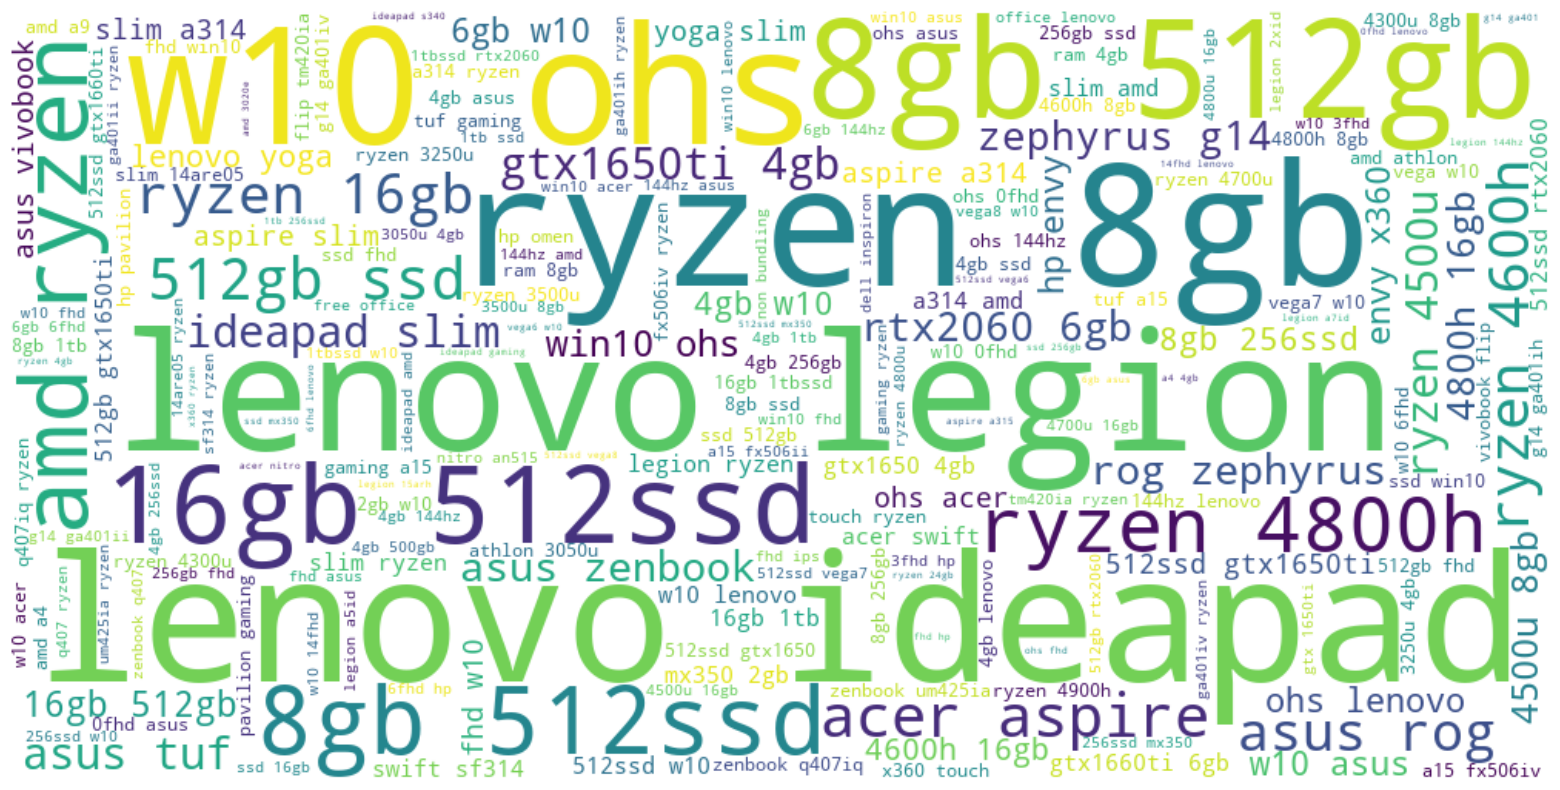

In [30]:
# Check the popular word from the products with AMD CPU to gain more informations if possible
cpu_ryzen_df = df[df['cpu'].str.contains('amd', case=False, na=False)]

text = ' '.join(cpu_ryzen_df['name_lower'])
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

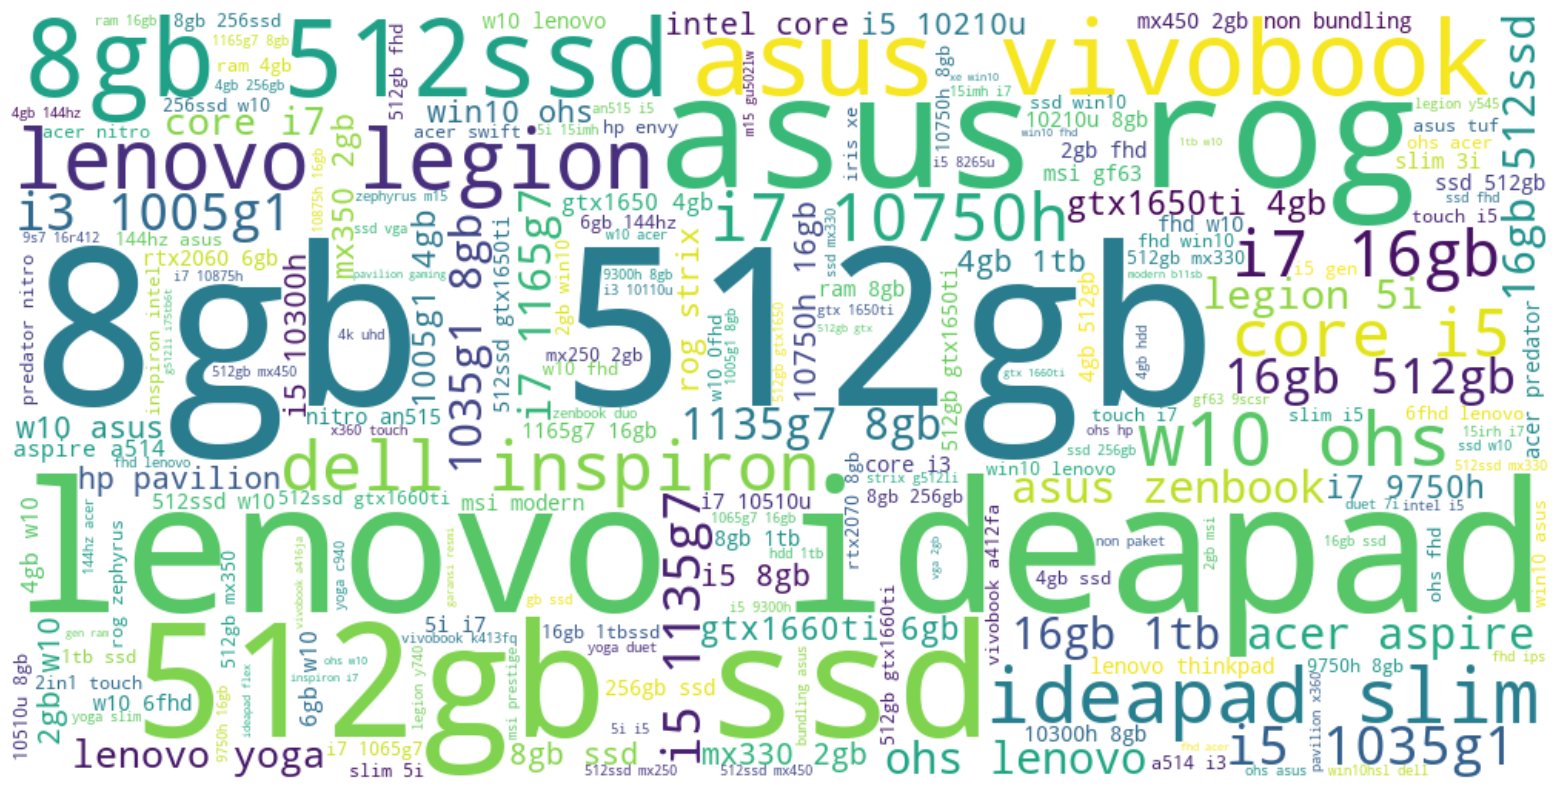

In [31]:
# Check the popular word from the products with Intel CPU to gain more informations if possible
cpu_intel_df = df[df['cpu'].str.contains('intel', case=False, na=False)]

cpu_intel_df
text = ' '.join(cpu_intel_df['name_lower'])
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### h. Check the NaN value in the dataset

In [32]:
df.isna().sum()

name             0
price            0
location         0
sold             0
link             0
date             0
series           0
brand            0
id_shop          0
name_lower       0
id_product       0
storage       3436
cpu           2160
dtype: int64

In [33]:
nan_rows_df = df[df.isnull().any(axis=1)].copy()

nan_rows_df

name       price  \
4      Acer Aspire 514-53G-52SR with Intel i5 10th Ge...   8650000.0   
14     LAPTOP HP ELITEBOOK 8460p CORE I5| GEN2|KONDIS...   2550000.0   
17     Laptop Lenovo X240 Core i5 - Ram 8gb - Hdd 500...   3399000.0   
18     Laptop HP elitebook 725 G3 - AMD A8 gen 8 - RA...   3499000.0   
30     Laptop Dell Latitude E6440 |Core i5 -Gen 4 | F...   3750000.0   
...                                                  ...         ...   
20408  MSI Prestige 14 A10SC [9S7-14C112-041] - Carbo...  25999000.0   
20414  MSI Prestige 15 A10SC [9S7-16S311-080] - Carbo...  20999000.0   
20421  MSI Prestige 14 A10SC [9S7-14C112-061] - Carbo...  19999000.0   
20425  MSI Prestige 14 A10SC [9S7-14C112-041] - Carbo...  25999000.0   
20429  MSI Prestige 15 A10SC [9S7-16S311-080] - Carbo...  20999000.0   

            location  sold                                               link  \
4          Surakarta     4  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
14     Jakarta Utara     5  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
17            Bekasi   555  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
18     Jakarta Barat    14  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
30     Jakarta Pusat    11  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
...              ...   ...                                                ...   
20408  Jakarta Pusat     3  https://www.tokopedia.com/msi-official/msi-pre...   
20414  Jakarta Pusat    35  https://www.tokopedia.com/msi-official/msi-pre...   
20421  Jakarta Pusat     5  https://www.tokopedia.com/msi-official/msi-pre...   
20425  Jakarta Pusat     3  https://www.tokopedia.com/msi-official/msi-pre...   
20429  Jakarta Pusat    35  https://www.tokopedia.com/msi-official/msi-pre...   

            date    series brand           id_shop  \
4     2021-01-14    aspire  Acer  ariekakakoesnadi   
14    2021-01-14    aspire  Acer     globaljaya125   
17    2021-01-14    aspire  Acer      debbybatavia   
18    2021-01-14    aspire  Acer      revocomputer   
30    2021-01-14    aspire  Acer     fortunelaptop   
...          ...       ...   ...               ...   
20408 2021-01-28  prestige   MSI      msi-official   
20414 2021-01-28  prestige   MSI      msi-official   
20421 2021-01-29  prestige   MSI      msi-official   
20425 2021-01-29  prestige   MSI      msi-official   
20429 2021-01-29  prestige   MSI      msi-official   

                                              name_lower  id_product storage  \
4      acer aspire 514-53g-52sr with intel i5 10th ge...           5     NaN   
14      hp elitebook 8460p core i5| gen2|kondisi mulu...          16     NaN   
17      lenovo x240 core i5 - ram 8gb - hdd 500gb- be...          19     NaN   
18      hp elitebook 725 g3 - amd a8 gen 8 - ram 8gb ...          20     NaN   
30      dell latitude e6440 |core i5 -gen 4 | full hd...          32     NaN   
...                                                  ...         ...     ...   
20408  msi prestige 14 a10sc [9s7-14c112-041] - carbo...        5108     NaN   
20414  msi prestige 15 a10sc [9s7-16s311-080] - carbo...        5111     NaN   
20421  msi prestige 14 a10sc [9s7-14c112-061] - carbo...        5112     NaN   
20425  msi prestige 14 a10sc [9s7-14c112-041] - carbo...        5108     NaN   
20429  msi prestige 15 a10sc [9s7-16s311-080] - carbo...        5111     NaN   

         cpu  
4      Intel  
14     Intel  
17     Intel  
18       AMD  
30     Intel  
...      ...  
20408    NaN  
20414    NaN  
20421    NaN  
20425    NaN  
20429    NaN  

[4452 rows x 13 columns]

There are **3436** empty values in the feature variable `storage` and **2160** empty valus in the feature variable `cpu` with total **4452** row with NaN values

In [34]:
nan_rows_df['sold'].max()

1100

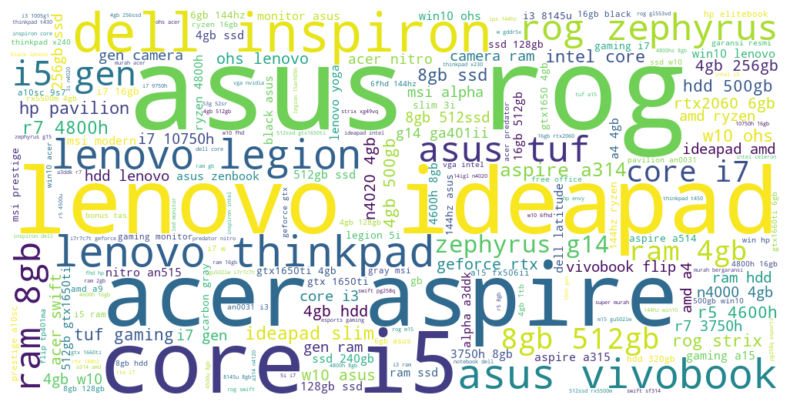

In [35]:
# Check the popular word from the products which lack of specification information in order to gain more informations if possible
text = ' '.join(nan_rows_df['name_lower'])
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In the consideration that there are huge sold number by the product that lacks information about the specification and as the specification can be considered as trivial information, the data row with NaN value will be kept.

### i. Get product name without the specification

In [36]:
# Make sure all words is separated with space only
df['name_lower'] = df['name_lower'].str.replace('|', ' ')
df['name_lower'] = df['name_lower'].str.replace('/', ' ')
df['name_lower'] = df['name_lower'].str.replace('  ', ' ')

In [37]:
# Try the first 3 words of the product from 20 samples
df['name_lower'].sample(n=20).str.split().str[:3].apply(lambda x: ' '.join(word for word in x))

6211             asus tuf gaming
16585            lenovo legion 5
13713        lenovo ideapad slim
9993     toshiba dynabook second
20288            msi prestige 14
12362        hp omen 15-en0013ax
11620               hp envy x360
4718     asus rog g531gt-i765g1t
10570         dell inspiron 3476
11682                 hp envy dv
10064         dell inspiron 3467
15472           lenovo ideapad 3
18499           lenovo yoga slim
6406             asus tuf gaming
19025           lenovo yoga slim
17131            lenovo legion 5
9595          asus zenbook ryzen
15980        lenovo ideapad slim
1117         acer aspire a311-31
6206                asus tuf a15
Name: name_lower, dtype: object

In [38]:
# Try the first 4 words of the product from 20 samples
df['name_lower'].sample(n=20).str.split().str[:4].apply(lambda x: ' '.join(word for word in x))

10945     lenovo thinkpad x240 i5-4300u
8283            asus vivobook 14 k413ea
18380                lenovo yoga slim 7
9816             dell inspiron aio 5400
16289            lenovo legion 5i 15imh
6624               asus tuf a15 fx506ih
7895             asus vivobook e203 4gb
14797            lenovo ideapad slim 5i
17023         lenovo legion y520 gaming
1247       acer aspire 3-a315-amd ryzen
6534            lenovo ideapad gaming 3
6746                legion 5 a7id ryzen
325             acer aspire 5 a514-core
1037          notebook dell vostro 3401
9896               dell inspiron 5482 2
5567              asus rog strix g512li
8809            asus zenbook q407 ryzen
5964              hp pavilion gaming 15
7129     asus vivobook k413fq i5-10210u
15619          lenovo ideapad 5 14itl05
Name: name_lower, dtype: object

In [39]:
# Try the first 5 words of the product from 20 samples
df['name_lower'].sample(n=20).str.split().str[:5].apply(lambda x: ' '.join(word for word in x))

16247           lenovo legion 5i i7-10750h 16gb
5198             asus rog g732lxs i78sd6t 300hz
16719            lenovo legion y520 gaming 1050
18922                  lenovo yoga slim 7 14are
3640              asus rog zephyrus g14 ga401ii
15327           lenovo ideapad slim 3 i3-1005g1
14628                 lenovo ideapad 320 amd a4
16424                    lenovo legion 5 - 2xid
17485               lenovo legion 5i 4rid 144hz
12421            hp pavilion gaming 15 ec1076ax
18200                lenovo yoga slim 7 14are05
1939                    acer aspire 5 a514-53 -
5171            asus rog gl503ge-en130t - intel
5352                    asus rog gl504gm-es029t
8683               asus zenbook ux330ua core i7
20195                  msi modern 14 b10ra core
12084            hp envy x360 13-ay0006au ryzen
19241      gaming msi alpha 15 [9s7-16u622-060]
19917    msi modern 14 b10rbsw [9s7-14d112-247]
9882                  dell inspiron 5570 ( core
Name: name_lower, dtype: object

Consideration of n first words as the products name
- n = 3 slightly lacks of laptop's version. For example: 'asus tuf gaming' as Tuf 
- n = 4 gives enough information of laptop's version. For example: 'asus tuf a15 fx506ih'
- n = 5 gives more than enough information of laptop as it also gives a glimpse of laptop's specification. For example: 'lenovo ideapad slim 3 i3-1005g1'

Thus, the first 3 words will be taken as the products name. All the product's name words in feature variable `product` will be capitalize.

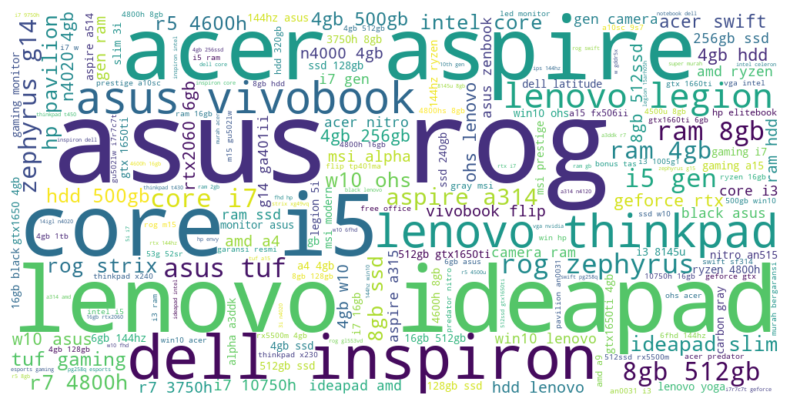

In [40]:
text = ' '.join(nan_rows_df['name_lower'])
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
df['product'] = df['name_lower'].str.split().str[:4].apply(lambda x: ' '.join([word.capitalize() for word in x]))

df

name       price  \
0      Acer Aspire 5 A514-53 i3-1005G1 4GB 512GB FREE...   7350000.0   
1      Acer Aspire 3 A314-22 Athlon Silver A3050 + FH...   5555000.0   
2      ACER ASPIRE 3 SLIM A314 AMD ATHLON 3050/4GB/SS...   6299000.0   
3      Acer Aspire 5 A514-53 - i3-1005G1 8GB 512GB + ...   7750000.0   
4      Acer Aspire 514-53G-52SR with Intel i5 10th Ge...   8650000.0   
...                                                  ...         ...   
20430  MSI PRESTIGE 14 i7 10710 8GB 512ssd GTX1650 4G...  18699000.0   
20431  MSI PRESTIGE 15 A10SC-080ID I7-10710U 16GB 512...  23499000.0   
20432  Laptop MSI Prestige 14 A10RAS - 217 (pink) i7-...  19999000.0   
20433  MSI Prestige 14 A11SCX [9S7-14C412-231] i7-118...  27999000.0   
20434  MSI LAPTOP PRESTIGE 14-A11SCX-231 i7-1185G7 32...  27999000.0   

            location  sold                                               link  \
0      Jakarta Utara     8  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
1           Surabaya    11  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
2              Medan     1  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
3             Kediri     3  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
4          Surakarta     4  https://ta.tokopedia.com/promo/v1/clicks/8a-xg...   
...              ...   ...                                                ...   
20430  Jakarta Utara     1  https://www.tokopedia.com/royalltech/msi-prest...   
20431  Jakarta Pusat     3  https://www.tokopedia.com/zxcomputer/msi-prest...   
20432        Bandung     1  https://www.tokopedia.com/dentshop/laptop-msi-...   
20433  Jakarta Pusat     1  https://www.tokopedia.com/msi-official/msi-pre...   
20434  Jakarta Pusat     1  https://www.tokopedia.com/globalpersadasys/msi...   

            date    series brand           id_shop  \
0     2021-01-14    aspire  Acer      tokolaptopid   
1     2021-01-14    aspire  Acer     trinityitzone   
2     2021-01-14    aspire  Acer  majumandiricom-1   
3     2021-01-14    aspire  Acer        rajacomkdr   
4     2021-01-14    aspire  Acer  ariekakakoesnadi   
...          ...       ...   ...               ...   
20430 2021-01-29  prestige   MSI        royalltech   
20431 2021-01-29  prestige   MSI        zxcomputer   
20432 2021-01-29  prestige   MSI          dentshop   
20433 2021-01-29  prestige   MSI      msi-official   
20434 2021-01-29  prestige   MSI  globalpersadasys   

                                              name_lower  id_product storage  \
0      acer aspire 5 a514-53 i3-1005g1 4gb 512gb free...           1  512 GB   
1      acer aspire 3 a314-22 athlon silver a3050 + fh...           2  256 GB   
2      acer aspire 3 slim a314 amd athlon 3050 4gb ss...           3  256 GB   
3      acer aspire 5 a514-53 - i3-1005g1 8gb 512gb + ...           4  512 GB   
4      acer aspire 514-53g-52sr with intel i5 10th ge...           5     NaN   
...                                                  ...         ...     ...   
20430  msi prestige 14 i7 10710 8gb 512ssd gtx1650 4g...        5118  512 GB   
20431  msi prestige 15 a10sc-080id i7-10710u 16gb 512...        5120  512 GB   
20432   msi prestige 14 a10ras - 217 (pink) i7-10510u...        5116  512 GB   
20433  msi prestige 14 a11scx [9s7-14c412-231] i7-118...        5119    1 TB   
20434  msi prestige 14-a11scx-231 i7-1185g7 32gb 1tb ...        5113    1 TB   

         cpu                               product  
0      Intel                 Acer Aspire 5 A514-53  
1        AMD                 Acer Aspire 3 A314-22  
2        AMD                    Acer Aspire 3 Slim  
3      Intel                 Acer Aspire 5 A514-53  
4      Intel         Acer Aspire 514-53g-52sr With  
...      ...                                   ...  
20430  Intel                    Msi Prestige 14 I7  
20431  Intel           Msi Prestige 15 A10sc-080id  
20432  Intel                Msi Prestige 14 A10ras  
20433  Intel                Msi Prestige 14 A11scx  
20434  Intel  Msi Pre

# Final Result of Cleaned Dataset

In [42]:
# Take the important feature variable only
cleaned_column_order = ['id_product', 'product', 'brand', 'series', 'price', 'id_shop', 'location', 'storage', 'cpu', 'date', 'sold']
df_cleaned = df[cleaned_column_order]

df_cleaned

id_product                               product brand    series  \
0               1                 Acer Aspire 5 A514-53  Acer    aspire   
1               2                 Acer Aspire 3 A314-22  Acer    aspire   
2               3                    Acer Aspire 3 Slim  Acer    aspire   
3               4                 Acer Aspire 5 A514-53  Acer    aspire   
4               5         Acer Aspire 514-53g-52sr With  Acer    aspire   
...           ...                                   ...   ...       ...   
20430        5118                    Msi Prestige 14 I7   MSI  prestige   
20431        5120           Msi Prestige 15 A10sc-080id   MSI  prestige   
20432        5116                Msi Prestige 14 A10ras   MSI  prestige   
20433        5119                Msi Prestige 14 A11scx   MSI  prestige   
20434        5113  Msi Prestige 14-a11scx-231 I7-1185g7   MSI  prestige   

            price           id_shop       location storage    cpu       date  \
0       7350000.0      tokolaptopid  Jakarta Utara  512 GB  Intel 2021-01-14   
1       5555000.0     trinityitzone       Surabaya  256 GB    AMD 2021-01-14   
2       6299000.0  majumandiricom-1          Medan  256 GB    AMD 2021-01-14   
3       7750000.0        rajacomkdr         Kediri  512 GB  Intel 2021-01-14   
4       8650000.0  ariekakakoesnadi      Surakarta     NaN  Intel 2021-01-14   
...           ...               ...            ...     ...    ...        ...   
20430  18699000.0        royalltech  Jakarta Utara  512 GB  Intel 2021-01-29   
20431  23499000.0        zxcomputer  Jakarta Pusat  512 GB  Intel 2021-01-29   
20432  19999000.0          dentshop        Bandung  512 GB  Intel 2021-01-29   
20433  27999000.0      msi-official  Jakarta Pusat    1 TB  Intel 2021-01-29   
20434  27999000.0  globalpersadasys  Jakarta Pusat    1 TB  Intel 2021-01-29   

       sold  
0         8  
1        11  
2         1  
3         3  
4         4  
...     ...  
20430     1  
20431     3  
20432     1  
20433     1  
20434     1  

[20435 rows x 11 columns]

In [43]:
df_cleaned.to_csv('data/cleaned.csv')